In [1]:
import numpy as np
import sys
from scipy.optimize import curve_fit
sys.path.append("..")

import matplotlib.pyplot as plt
from python.utils import round_sig
from python.Hubbard import Hubbard_model, Double_occupancy
from python.DMRG import DMRG
from python.Zippers import MPO_to_Hamiltonian, MPS_MPO_MPS_overlap

# (a) U = 2

In [2]:
n_sites = 40

hopping_t = 1.0
interaction_U = 2.0

Hamiltonian_2 = Hubbard_model(n_sites = n_sites, hopping_t=hopping_t, interaction_U=interaction_U)
MPO_transposed_2 = [ham.transpose(2, 3, 0, 1) for ham in Hamiltonian_2]

In [3]:
# matrix = MPO_to_Hamiltonian(MPO_transposed)
# eigvals, _ = np.linalg.eigh(matrix)
# eigvals[0]

In [4]:
# np.linalg.norm(matrix - matrix.T)

In [5]:
NKeeps = [60, 40, 30, 24, 20]
NKeeps = np.array(NKeeps)[::-1]
NSweep = 10
Krylov_bases = 5 #* 5 is usually enough
Lanczos_cutoff = 1e-4
iterative_diag = True
two_site = True
verbose = True

In [ ]:
ground_state_energy_2 = []
double_occupancies_2 = []

for it, NKeep in enumerate(NKeeps):

    energies_2, times_2, MPS_2 = DMRG(
        Hamiltonian = Hamiltonian_2,
        NKeep = NKeep,
        NSweep = NSweep,
        Krylov_bases = Krylov_bases,
        Lanczos_cutoff = Lanczos_cutoff,
        iterative_diag = iterative_diag,
        two_site = two_site,
        verbose = verbose,
    )
    
    double_occupancy_2 = Double_occupancy(MPS_2)
    
    ground_state_energy_2.append(energies_2[-1])
    double_occupancies_2.append(double_occupancy_2)

L=40 | NKeep=20 | NSweep=10 | iterative=True | two_site=True | Krylov_bases=5 | Lanczos_cutoff=0.0001
iter=0 | energy=-32.149504 | time=0.0s
iter=1 | energy=-33.16207 | time=7.16s
iter=2 | energy=-33.164968 | time=12.5s
iter=3 | energy=-33.165099 | time=19.2s
iter=4 | energy=-33.165109 | time=25.1s
iter=5 | energy=-33.16511 | time=31.0s
iter=6 | energy=-33.16511 | time=32.6s
iter=7 | energy=-33.16511 | time=33.6s
iter=8 | energy=-33.16511 | time=34.6s
iter=9 | energy=-33.16511 | time=35.6s
iter=10 | energy=-33.16511 | time=36.5s
L=40 | NKeep=24 | NSweep=10 | iterative=True | two_site=True | Krylov_bases=5 | Lanczos_cutoff=0.0001
iter=0 | energy=-32.423095 | time=0.0s
iter=1 | energy=-33.183146 | time=1.98s
iter=2 | energy=-33.18312 | time=3.21s
iter=3 | energy=-33.183119 | time=4.26s
iter=4 | energy=-33.183119 | time=5.38s
iter=5 | energy=-33.183119 | time=6.4s
iter=6 | energy=-33.183119 | time=7.46s
iter=7 | energy=-33.183119 | time=8.47s
iter=8 | energy=-33.183119 | time=9.54s
iter=9

Text(0, 0.5, 'Double occupancy $\\langle n_{l\\uparrow}n_{l\\downarrow}\\rangle$')

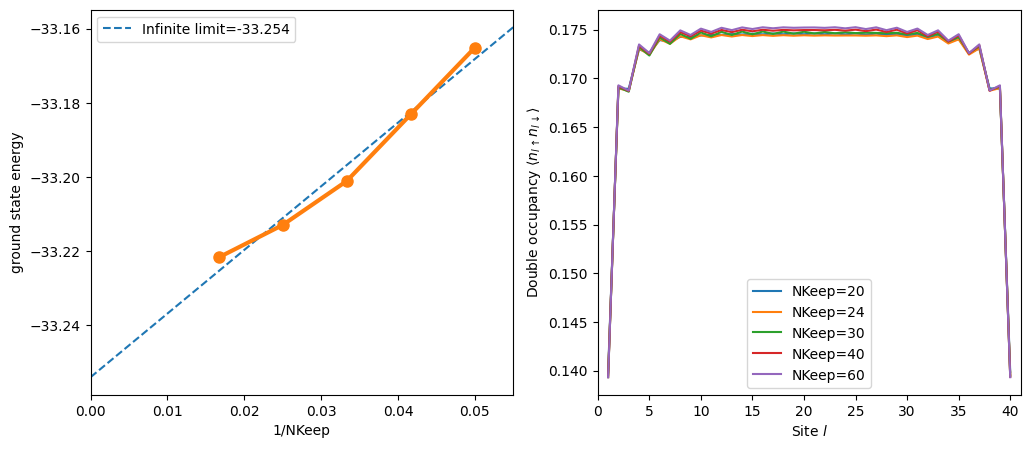

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for NKeep, double_occupancy_2 in zip(NKeeps, double_occupancies_2):
    ax2.plot(np.arange(1, len(double_occupancy_2)+1), double_occupancy_2, label=f"{NKeep=}")

def infinite_extrapolation(x, a, b):
    
    return a + b*x

params, _ = curve_fit(
    infinite_extrapolation, 1/NKeeps, ground_state_energy_2,
)

Xs = np.linspace(0, 1/NKeeps[0] * 1.1, 100)
ax1.plot(Xs, infinite_extrapolation(Xs, *params), linestyle="--", label=rf"Infinite limit={round_sig(params[0], 5)}")

ax1.errorbar(1/NKeeps, ground_state_energy_2, fmt="-o", linewidth=3, markersize=8)

ax1.set_xlabel(r"1/NKeep")
ax1.set_ylabel(r"ground state energy")

ax1.set_xlim(0, 1/NKeeps[0] * 1.1)

ax1.legend()
ax2.legend()

ax2.set_xlim(0, n_sites+1)

ax2.set_xlabel(r"Site $l$")
ax2.set_ylabel(r"Double occupancy $\langle n_{l\uparrow}n_{l\downarrow}\rangle$")

# (b) U = 10

In [ ]:
n_sites = 40

hopping_t = 1.0
interaction_U = 10

Hamiltonian_10 = Hubbard_model(n_sites = n_sites, hopping_t=hopping_t, interaction_U=interaction_U)


In [ ]:
NKeeps = [60, 40, 30, 24, 20]
NKeeps = np.array(NKeeps)[::-1]
NSweep = 10
Krylov_bases = 5 #* 5 is usually enough
Lanczos_cutoff = 1e-4
iterative_diag = True
two_site = True
verbose = True

In [ ]:
ground_state_energy_10 = []
double_occupancies_10 = []

for it, NKeep in enumerate(NKeeps):

    energies_10, times_10, MPS_10 = DMRG(
        Hamiltonian = Hamiltonian_10,
        NKeep = NKeep,
        NSweep = NSweep,
        Krylov_bases = Krylov_bases,
        Lanczos_cutoff = Lanczos_cutoff,
        iterative_diag = iterative_diag,
        two_site = two_site,
        verbose = verbose,
    )
    
    double_occupancy_10 = Double_occupancy(MPS_10)
    
    ground_state_energy_10.append(energies_10[-1])
    double_occupancies_10.append(double_occupancy_10)

L=40 | NKeep=20 | NSweep=10 | iterative=True | two_site=True | Krylov_bases=5 | Lanczos_cutoff=0.0001
iter=0 | energy=-1.0308963 | time=0.0s
iter=1 | energy=-10.482471 | time=2.02s
iter=2 | energy=-10.513842 | time=3.68s
iter=3 | energy=-10.515731 | time=5.99s
iter=4 | energy=-10.51587 | time=7.38s
iter=5 | energy=-10.515872 | time=9.01s
iter=6 | energy=-10.515863 | time=11.2s
iter=7 | energy=-10.51587 | time=12.7s
iter=8 | energy=-10.515876 | time=15.2s
iter=9 | energy=-10.515879 | time=16.8s
iter=10 | energy=-10.515879 | time=25.4s
L=40 | NKeep=24 | NSweep=10 | iterative=True | two_site=True | Krylov_bases=5 | Lanczos_cutoff=0.0001
iter=0 | energy=-1.0321087 | time=0.0s
iter=1 | energy=-10.473053 | time=4.09s
iter=2 | energy=-10.51392 | time=6.57s
iter=3 | energy=-10.516316 | time=9.96s
iter=4 | energy=-10.51642 | time=11.6s
iter=5 | energy=-10.516433 | time=16.8s
iter=6 | energy=-10.516444 | time=20.4s
iter=7 | energy=-10.516451 | time=23.2s
iter=8 | energy=-10.516461 | time=24.9s
i

Text(0, 0.5, 'Double occupancy $\\langle n_{l\\uparrow}n_{l\\downarrow}\\rangle$')

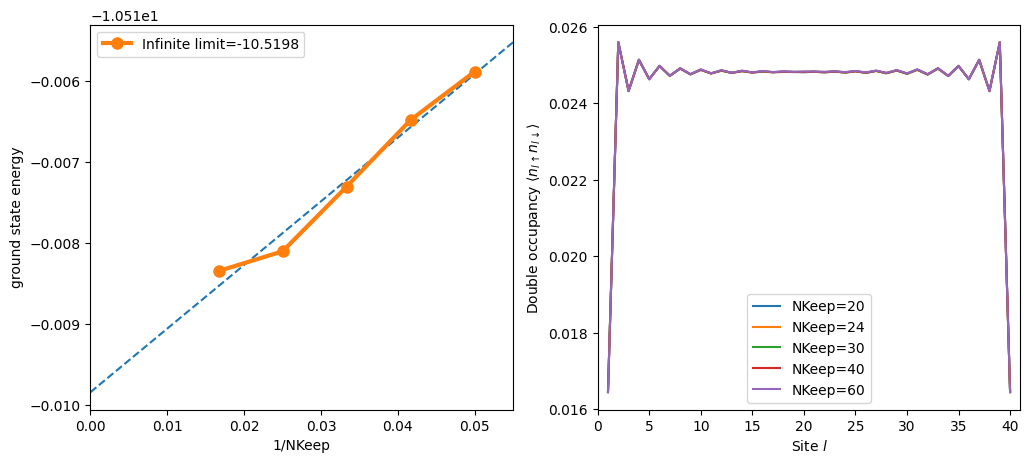

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for NKeep, double_occupancy_10 in zip(NKeeps, double_occupancies_10):
    ax2.plot(np.arange(1, len(double_occupancy_10)+1), double_occupancy_10, label=f"{NKeep=}")

def infinite_extrapolation(x, a, b):
    
    return a + b*x

params, _ = curve_fit(
    infinite_extrapolation, 1/NKeeps, ground_state_energy_10,
)

Xs = np.linspace(0, 1/NKeeps[0] * 1.1, 100)
ax1.plot(Xs, infinite_extrapolation(Xs, *params), linestyle="--")

ax1.errorbar(1/NKeeps, ground_state_energy_10, label=rf"Infinite limit={round_sig(params[0], 6)}", fmt="-o", linewidth=3, markersize=8)

ax1.set_xlabel(r"1/NKeep")
ax1.set_ylabel(r"ground state energy")

ax1.set_xlim(0, 1/NKeeps[0] * 1.1)

ax1.legend()
ax2.legend()

ax2.set_xlim(0, n_sites+1)

ax2.set_xlabel(r"Site $l$")
ax2.set_ylabel(r"Double occupancy $\langle n_{l\uparrow}n_{l\downarrow}\rangle$")